<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_Lab_regressao_linear1_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Lab: Regressão Linear**

## Outras questões de revisão:

1. O que é **multicolinearidade** e onde ela aparece aqui?
2. Qual a diferença entre o $R^2$ e o $R^2$ **Ajustado**?
3. Como decidir sobre o coeficiente significativo ou não do hot-encode de variáveis categóricas?
4. Duas questões importantes que não apareceram aqui, mas constam dos exemplos e exercícios. Você saberia tratá-las:
  * **Variáveis de interação**
  * Como decidir sobre a **maior ou menor influência de uma variável preditora**?
5. Veja aqui, duas condições importantes sobre os resíduos dos modelos, a **normalidade e resíduos não correlacionados**. O teste de normalidade você já conhece e adicionei um teste *fraco* para verificar a correlação dos resíduos.
6. Considere duas séries de valores, por exemplo a quantidade de OVNIs avistados diariamente em São Tomé das Letras e o número de barris diários de petróleo extraídos da Bacia de Campos pela Petrobrás. O $R^2$ corresponde à **correlação de pearson** entre esses dados?
7. Você entenda o significado da métrica **`MAPE`**.
8. **Considere que na base `penguins` abaixo você tivesse o número do RA (:-))  de cada pinguim, seu apelido e sua cor. Quais desses atributos você consideraria incluir no modelo de regressão para estimativa do peso dos pinguins?**



## imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    metrics = {}

    # Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Mean Absolute Percentage Error (MAPE)
    if np.any(y_true == 0):
        metrics['MAPE'] = 'Undefined (division by zero)'
    else:
        metrics['MAPE'] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(y_true, y_pred)

    # Symmetric Mean Absolute Percentage Error (sMAPE)
    metrics['sMAPE'] = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    # Mean Absolute Deviation (MAD)
    metrics['MAD'] = np.mean(np.abs(y_true - np.mean(y_true)))

    # for key, value in metrics.items():
    #     print(f"{key}: {value:.2f}")

    return metrics

# calculate_metrics(y_true, y_pred)

# metrics = calculate_metrics(y_true, y_pred)
# for key, value in metrics.items():
#     print(f"{key}: {value:.2f}")


In [ ]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Ex1. Vanilla `statsmodels` I (2.5)

Faça um modelo de regressão linear para estimar os valores de `body_mass_g` com base nos demais atributos **numéricos** (considere todas as variáveis independente do $p-value$ indicar o atributo significativo ou não). Com o modelo obtido faça a predição do peso (`body_mass_g`) de pinguins com as seguintes medidas:

```
bill_length_mm	bill_depth_mm	flipper_length_mm
      38	           17	             190
      40	           21	             198
```

**nota**: Lembre-se de verificar a presença de valores nulos, excluindo quaisquer linhas com quaisquer valores ausentes.

In [ ]:
df = df.dropna()

In [ ]:
lm = sm.ols('body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          9.26e-103
Time:                        01:59:57   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.13

In [ ]:
df_case = pd.DataFrame({'bill_length_mm':[38,40], 'bill_depth_mm':[17,21], 'flipper_length_mm':[190,198]})
df_case


,bill_length_mm,bill_depth_mm,flipper_length_mm
0,38,17,190
1,40,21,198


In [ ]:
df_case['body_mass_g_pred'] =  lm.predict(df_case).values
df_case

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g_pred
0,38,17,190,3627.676399
1,40,21,198,4111.704741


# Ex2. Vanilla `statsmodels` II (2.5)

Faça um modelo de regressão linear para estimar os valores de `body_mass_g` com base em **todos os atributos preditores significativos**. Com o modelo  obtido faça a predição do peso (`body_mass_g`) de um pinguim do sexo feminino, da especie Adelie e da ilha de Torgersen cujas as demais medidas são a média da medidas de sua espécie e sexo.



In [ ]:
lm = sm.ols('body_mass_g ~ species + island + bill_length_mm + bill_depth_mm + flipper_length_mm + sex', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     284.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.85e-141
Time:                        01:59:57   Log-Likelihood:                -2353.6
No. Observations:                 333   AIC:                             4725.
Df Residuals:                     324   BIC:                             4760.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1500.0291 

In [ ]:
lm = sm.ols('body_mass_g ~ species + bill_length_mm + bill_depth_mm + flipper_length_mm + sex', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     380.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.82e-144
Time:                        01:59:57   Log-Likelihood:                -2354.0
No. Observations:                 333   AIC:                             4722.
Df Residuals:                     326   BIC:                             4749.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1460.9946 

In [ ]:
df_case = pd.DataFrame(df[ (df.species == 'Adelie') & (df.sex == 'Female') ].select_dtypes(include='number').drop(columns='body_mass_g').mean()).T
df_case['species'] = 'Adelie'
df_case['island'] = 'Torgersen'
df_case['sex'] = 'Female'
df_case

,bill_length_mm,bill_depth_mm,flipper_length_mm,species,island,sex
0,37.257534,17.621918,187.794521,Adelie,Torgersen,Female


In [ ]:
df_case['body_mass_g_pred'] =  lm.predict(df_case).values
df_case

,bill_length_mm,bill_depth_mm,flipper_length_mm,species,island,sex,body_mass_g_pred
0,37.257534,17.621918,187.794521,Adelie,Torgersen,Female,3397.130037


# Ex3. `scikit-learn` (2.5)

Faça um modelo de regressão linear, agora empregando o `scikit-learn`, **idêntico ao modelo final obtido no exercício anterior, EXCETO que você deve excluir nesse modelo o intercept.** Obtenha o R2 e o valor previsto para o mesmo caso do exercício anterior.

Nota: lembre-se que os resultados, por conta do intercept, divergem e você deverá mesmo fazer o uso do `scikit-learn`.


In [ ]:
df['T.Chinstrap'] = df['species'] == 'Chinstrap'
df['T.Gentoo'] = df['species'] == 'Gentoo'
df['T.Male'] = df['sex'] == 'Male'
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,T.Chinstrap,T.Gentoo,T.Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False,False,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False,False,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False,False,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,False,False,True


In [ ]:
X = df.select_dtypes(exclude='object').drop(columns=['body_mass_g'])
y = df['body_mass_g']

model = LinearRegression(fit_intercept=False) # set fit_intercept to False
# model = LinearRegression()
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

erro = calculate_metrics(df['body_mass_g'], model.predict(df.select_dtypes(exclude='object').drop(columns=['body_mass_g'])))
print(f'MAPE: {erro["MAPE"]:.2f}')
print(f'RMSE: {erro["RMSE"]:.2f}')



Coeficientes:  {'bill_length_mm': 15.10690602402323, 'bill_depth_mm': 48.99990246587304, 'flipper_length_mm': 10.474076244832517, 'T.Chinstrap': -190.33836728916202, 'T.Gentoo': 1125.7875038202196, 'T.Male': 464.0420304925369}
Intercept:  0.0
Score (R2):  0.8724536514447967

MAPE: 5.65
RMSE: 287.14


In [ ]:
df_case['T.Chinstrap'] = 0
df_case['T.Gentoo'] = 0
df_case['T.Male'] = 0
df_case.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species,island,sex,body_mass_g_pred,T.Chinstrap,T.Gentoo,T.Male
0,37.257534,17.621918,187.794521,Adelie,Torgersen,Female,3397.130037,0,0,0


In [ ]:
# Predição
df_case['body_mass_g_scikit'] = model.predict(df_case.select_dtypes(exclude='object').drop(columns=['body_mass_g_pred']))
df_case

,bill_length_mm,bill_depth_mm,flipper_length_mm,species,island,sex,body_mass_g_pred,T.Chinstrap,T.Gentoo,T.Male,body_mass_g_scikit
0,37.257534,17.621918,187.794521,Adelie,Torgersen,Female,3397.130037,0,0,0,3393.292449


# Ex4. Erro e Resíduos (2.5)

Empregue o **mesmo modelo final do exercício Ex2.**

a. Calcule o MAPE e o RMSE do modelo sobre o conjunto total de dados

b. Os resíduos são o erro de previsão do modelo sem quaisquer transformações:

$$ Res_i = y_i - \hat{y_i} $$

Verifique graficamente se os resíduos têm distribuição normal.

In [ ]:
lm = sm.ols('body_mass_g ~ species + bill_length_mm + bill_depth_mm + flipper_length_mm + sex', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     380.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.82e-144
Time:                        01:59:57   Log-Likelihood:                -2354.0
No. Observations:                 333   AIC:                             4722.
Df Residuals:                     326   BIC:                             4749.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1460.9946 

In [ ]:
erro = calculate_metrics(df['body_mass_g'], lm.predict())
print(f'MAPE: {erro["MAPE"]:.3f}')
print(f'RMSE: {erro["RMSE"]:.3f}')

MAPE: 5.610
RMSE: 284.302


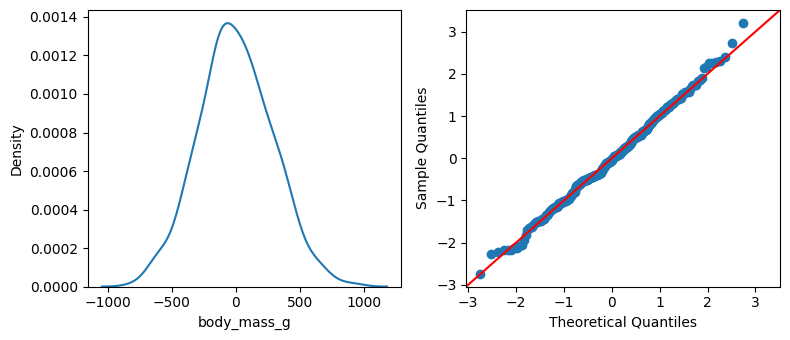

In [ ]:
from statsmodels.api import qqplot

residuos = df['body_mass_g'] - lm.predict()

fig, ax = plt.subplots(1,2,figsize=(8,3.5))

sns.kdeplot(x=residuos, ax=ax[0])
qqplot(residuos, fit=True, line="45", ax=ax[1])

plt.tight_layout()
plt.show()

In [ ]:
# Realizando um teste de normalidade nos resíduos (por exemplo, teste de Shapiro-Wilk)
from scipy.stats import shapiro
statistic, p_value = shapiro(residuos)
print('Estatística do teste:', statistic)
print('Valor-p:', p_value) # Valor-p > 0,05: Os dados são considerados normais (não rejeitamos H0)

# Verificando a autocorrelação dos resíduos (por exemplo, teste de Durbin-Watson)
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuos)
print('Estatística de Durbin-Watson:', dw_statistic)

# d próximo de 2: Indica ausência de autocorrelação.
# d próximo de 0: Indica autocorrelação positiva (resíduos positivos tendem a ser seguidos por outros resíduos positivos).
# d próximo de 4: Indica autocorrelação negativa (resíduos positivos tendem a ser seguidos por resíduos negativos).

# A informação de que a estatística de Durbin-Watson (d) está próxima de 2 é um indicativo de que pode não haver autocorrelação nos resíduos, mas não é uma prova conclusiva.

Estatística do teste: 0.9967228588516707
Valor-p: 0.7352857264198257
Estatística de Durbin-Watson: 2.1686446484173283


# Ex5. Diferentes modelos (1.0)

Compare o modelo linear do Ex3. (**considere agora o modelo linear com o intercept**) com os modelos robustos e outros dois modelos de regressão não linear do `scikit-learn`, o `SVR` e o `Ridge`. Quais desses modelos apresenta valores de R2 e um erro (RMSE) melhores que da regressão linear?

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import HuberRegressor, RANSACRegressor, TheilSenRegressor, Ridge

X = df.select_dtypes(exclude='object').drop(columns=['body_mass_g'])
y = df['body_mass_g']

models = []
R2 = []
MAPE = []
RMSE = []

for model in [LinearRegression(), SVR(), HuberRegressor(max_iter=1000), RANSACRegressor(), TheilSenRegressor(), Ridge()]:
  model.fit(X, y)
  models.append(model)
  R2.append(np.round(model.score(X, y),4))
  erro = calculate_metrics(df['body_mass_g'], model.predict(df.select_dtypes(exclude='object').drop(columns=['body_mass_g'])))
  MAPE.append(erro['MAPE'])
  RMSE.append(erro['RMSE'])

data = pd.DataFrame({'models':models,'R2':R2,'MAPE':MAPE,'RMSE':RMSE}).sort_values('RMSE')
data


,models,R2,MAPE,RMSE
0,LinearRegression(),0.8750,5.610262,284.302247
2,HuberRegressor(max_iter=1000),0.8746,5.582403,284.680224
5,Ridge(),0.8744,5.648390,284.967722
4,TheilSenRegressor(),0.8678,5.767481,292.373826
3,RANSACRegressor(),0.8523,6.078813,308.964462
1,SVR(),-0.0315,15.550875,816.565824
